In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix




In [33]:
# link to the kaggle dataset https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/data

df=pd.read_csv("C:\\Users\\user\\Downloads\\car_evaluation.csv")

df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Explanatory Data Analysis 

In [34]:
 df.shape

(1727, 7)

In [35]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

<p>We Should Rename The Column Names first because they dont have a useful name currently</p>

In [36]:
df.columns=['Buy Probability', 'Maintenance', 'Door Number', 'Persons it can fit', 'Luggage Capacity', 'Safety', 'Classification']

In [37]:
df.head()

,Buy Probability,Maintenance,Door Number,Persons it can fit,Luggage Capacity,Safety,Classification
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Buy Probability     1727 non-null   object
 1   Maintenance         1727 non-null   object
 2   Door Number         1727 non-null   object
 3   Persons it can fit  1727 non-null   object
 4   Luggage Capacity    1727 non-null   object
 5   Safety              1727 non-null   object
 6   Classification      1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [39]:
df.isnull().sum()

Buy Probability       0
Maintenance           0
Door Number           0
Persons it can fit    0
Luggage Capacity      0
Safety                0
Classification        0
dtype: int64

<p> As we can see,there are no null values so no need to fill anything</p>

<p> Since all the features are categorical attributes we need to transform them into numerical values </p>
<p>since the categories are Ordinal in nature (ranges from low to very good) we can use the Ordinal Encoder for all features to transform them

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
Y=df['Classification']
X=df.drop(['Classification'],axis=1)

In [53]:
X.head()

,Buy Probability,Maintenance,Door Number,Persons it can fit,Luggage Capacity,Safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [54]:
Y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: Classification, dtype: object

In [58]:
ordenc=OrdinalEncoder()

In [75]:
X=ordenc.fit_transform(X)

Y=ordenc.fit_transform(Y.values.reshape(-1,1))


AttributeError: 'numpy.ndarray' object has no attribute 'values'

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [1.],
       [3.]])

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [84]:
print(X.size,X_train.size,X_test.size)

10362 8286 2076


## Model Selection

In [85]:
dt_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)

In [87]:
dt_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [88]:
Y_pred=dt_gini.predict(X_test)

## Checking The Accuracy

In [94]:
from sklearn.metrics import accuracy_score

In [96]:
confusion_matrix(Y_test,Y_pred)

array([[ 62,   0,  11,   0],
       [ 13,   0,   0,   0],
       [ 45,   0, 194,   0],
       [ 21,   0,   0,   0]], dtype=int64)

In [95]:
accuracy_score(Y_test,Y_pred)

0.7398843930635838

<p>Lets check if there is any overfitting when depth=3</p>

In [97]:
Y_train_pred=dt_gini.predict(X_train)

In [98]:
accuracy_score(Y_train,Y_train_pred)

0.7900072411296162

<p> As we can see, the accuracy score of the training and test set are roughly comparable,so there is no overfitting occuring</p>

# Hyperpararmeter Tuning

##### Lets check if we can improve the accuracy by increasing the max_depth variable

In [120]:

accuracy_list=[]

for i in range(1,8):

 dt_gini2=DecisionTreeClassifier(criterion='gini',max_depth=i,random_state=1)

 dt_gini2.fit(X_train,Y_train)

 y_pred2=dt_gini2.predict(X_test)

 y_pred_train2=dt_gini2.predict(X_train)
    
 print(f'\nTraining Set Accuracy for max depth= {i} is',accuracy_score(Y_train,y_pred_train2))
 print(f'Test Set Accuracy for max_depth = {i} is',accuracy_score(Y_test,y_pred2))

 accuracy_list.append(accuracy_score(Y_test,y_pred2))
    
    







Training Set Accuracy for max depth= 1 is 0.7023895727733527
Test Set Accuracy for max_depth = 1 is 0.6907514450867052

Training Set Accuracy for max depth= 2 is 0.7740767559739319
Test Set Accuracy for max_depth = 2 is 0.7485549132947977

Training Set Accuracy for max depth= 3 is 0.7900072411296162
Test Set Accuracy for max_depth = 3 is 0.7398843930635838

Training Set Accuracy for max depth= 4 is 0.837074583635047
Test Set Accuracy for max_depth = 4 is 0.7774566473988439

Training Set Accuracy for max depth= 5 is 0.8790731354091238
Test Set Accuracy for max_depth = 5 is 0.846820809248555

Training Set Accuracy for max depth= 6 is 0.8986241853729182
Test Set Accuracy for max_depth = 6 is 0.8554913294797688

Training Set Accuracy for max depth= 7 is 0.9283128167994207
Test Set Accuracy for max_depth = 7 is 0.8988439306358381


###### Plot of the accuracy score vs max_depth values

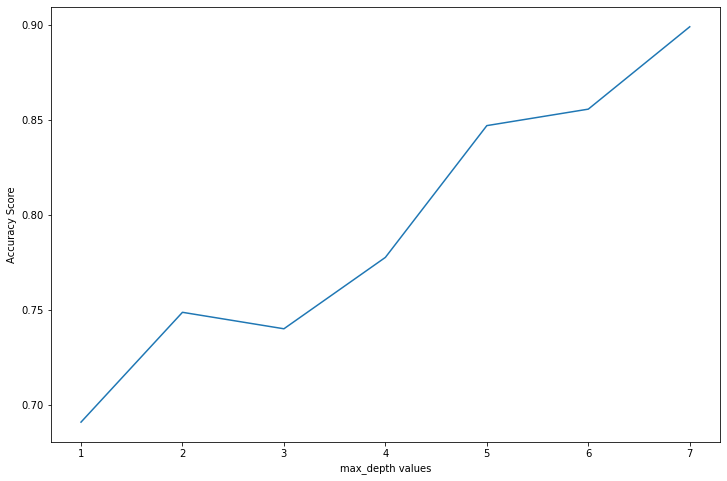

In [121]:
plt.figure(figsize=(12,8))



plt.plot(range(1,8),accuracy_list)

plt.xlabel('max_depth values')

plt.ylabel('Accuracy Score')

plt.show()


<p> The training set and test set errors when max_depth=7 are very close to each other,so there is no fear of overfitting when max_depth is is equal to 7,and the accuracy is very good, so it would be better to choose max_depth=7, if max_depth is higher than 7 than the fear of overfitting becomes more probable, and would require more computation time